In [8]:
import matplotlib.pyplot as plt
from geospatial0427 import *

In [146]:
# Segment & Polygon intersection


# Function: create segments list (of points pair) based on points in polygon
def get_seg_from_pol(pol):
    pol_seg = []
    for i in range(0, (pol.size-1)):
        pol_seg.append(Segment(pol.points[i], pol.points[i+1]))
    pol_seg.append(Segment(pol.points[pol.size-1], pol.points[0]))
    return pol_seg

# Function: calculate the intersection point of two segments which intersects
def get_intersect_point(seg1, seg2):
    A1 = seg.end.y - seg.start.y
    B1 = seg.start.x - seg.end.x
    C1 = seg.end.x * seg.start.y - seg.start.x * seg.end.y
    A2 = int_seg[i].end.y - int_seg[i].start.y
    B2 = int_seg[i].start.x - int_seg[i].end.x
    C2 = int_seg[i].end.x * int_seg[i].start.y - int_seg[i].start.x * int_seg[i].end.y
    x = (C2 * B1 - C1 * B2)/(A1 * B2 - A2 * B1)
    y = (C1 * A2 - C2 * A1)/(A1 * B2 - A2 * B1)
    return Point(x, y)

# Function: check if one segment touches the other if they intersects
def check_touch(seg1, seg2):
    if seg1.start == seg2.start or seg1.start == seg2.end or seg1.end == seg2.start or seg1.end == seg2.end:
        return True
    else:
        f1 = (seg1.end.y - seg1.start.y)/(seg1.start.x - seg1.end.x)
        f2 = (seg2.end.y - seg2.start.y)/(seg2.start.x - seg2.end.x)
        if f1 == f2:
            return True
        else:
            A1 = seg1.end.y - seg1.start.y
            B1 = seg1.start.x - seg1.end.x
            C1 = seg1.end.x * seg1.start.y - seg1.start.x * seg1.end.y
            A2 = seg2.end.y - seg2.start.y
            B2 = seg2.start.x - seg2.end.x
            C1 = seg2.end.x * seg2.start.y - seg2.start.x * seg2.end.y
            if (seg2.start.x*A1 + seg2.start.y*B1 + C1 == 0) or (seg2.end.x*A1 + seg2.end.y*B1 + C1 == 0) or (seg1.start.x*A2 + seg1.start.y*B2 + C2 == 0) or (seg1.end.x*A2 + seg1.end.y*B2 + C2 == 0):
                return True
            else:
                return False
            
        
    


# The algorithm that works for concave hull also works for convex hull, 
# so it's not necessary to differeniate between convex and concave hull at the beginning.

# Function: Check if one segment intersects with one polygon or not and calculate the overlapping length
## Notice: Touching the edge of polygon is not considered as intersection in the following lines
def inter_seg_pol(seg, pol):
    print(seg)
    # print(pol)
    
    # Create ordered segments from polygon
    segments_list = get_seg_from_pol(pol)
    
    # Prepare intersection segments list
    int_seg = []
    for i in range(1, pol.size):
        int_seg.append(seg.intersects(segments_list[i]))
    
    ## The segment has no intersection with edges of the polygon
    if set(int_seg) == "False" :
    ### The two points of the segment are both outside the polygon - No Need for further calculation
        if pol.containsPoint(seg.start) == True and pol.containsPoint(seg.end) == True:
            length = 0
            print(f"\nThe intersection length is: {length:.2f}")
            return length
        ### The two points of the segment are both inside the polygon
        if pol.containsPoint(seg.start) == False and pol.containsPoint(seg.end) == False:
        #### Calculate the length of the segment
            length = seg.length
            return length
            print(f"\nThe intersection length is: {length:.2f}")
    
    ## The segment has intersection with edges of the polygon
    else:
        for i in range(1, len(int_seg)):
            # Find the edges which the segment intersects with
            if int_seg[i] == "True":
                if check_touch(seg, int_seg[i]) == False:
                    point_i = []
                    # Find the intersecting point and store it in a list
                    point_i.append(get_intersect_point(seg, int_seg[i]))
                    point_i = append(seg.start)
                    point_i = append(seg.end)
                    point_i = sorted(point_i , key=lambda k: [k[1], k[0]])
                    n = len(point_i)
                    seg_i = []
                    length_i = []
                    for j in range(1, n):
                        seg_i[j] = Segment(seg_i[j], seg_i[j+1])
                        # Check if the center of the segments lie inside or outside the polygon
                        x_m = (seg_i[j].start.x + seg_i[j].end.x)/2
                        y_m = (seg_i[j].start.y + seg_i[j].end.y)/2
                        p_i = Point(x_m, y_m)
                        if pol.containsPoint(p_i) == True:
                            length_i.append(seg_i[j].length)
                            length = sum(length_i)
                            return length
                            print(f"\nThe intersection length is: {length:.2f}")                        
                        else:
                            print('There is a touch but no intersection')          
                else:
                    print("This small segment is outside the polygon")
            else:
                print('No intersection between edges and segment')
            
            
         
                
    
    
    
    
    
    #### Store all the intersecting point and create new segments
    #### Check if the the center point of the segment lie inside or outside the polygon for each segment
    #### Calculate the total length of the segments which its center lies inside the polygon
    
    



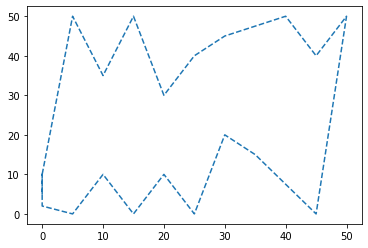

In [9]:
# Sample polygon (random points for the outline of England)
data_p = [[0,5],[0,10],[0,2],[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5, 50],[5,50], [0, 10]]
samplePolygon = Polygon(data_p, xcol=0, ycol=1)
xs = [i.x for i in samplePolygon]
ys = [i.y for i in samplePolygon]
plt.plot(xs, ys, linestyle='dashed')


Segment with start Point(x=0.00, y=20.00) and end Point(x=0.00, y=30.00).
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment


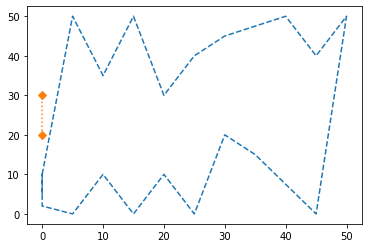

In [136]:
data_s = []
seg1 = Segment(Point(0,20), Point(0,30))
inter_seg_pol(seg1, samplePolygon)
plt.plot(xs, ys, linestyle='dashed')
x2 = [seg1.start.x, seg1.end.x]
y2 = [seg1.start.y, seg1.end.y]
plt.plot(x2, y2, linestyle="dotted", marker="D")

Segment with start Point(x=10.00, y=20.00) and end Point(x=25.00, y=25.00).
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment


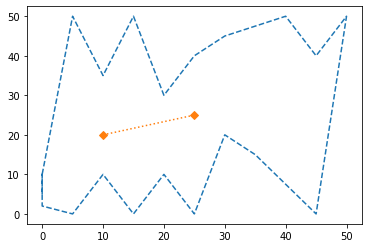

In [147]:
seg2 = Segment(Point(10,20), Point(25,25))
plt.plot(xs, ys, linestyle='dashed')
x2 = [seg2.start.x, seg2.end.x]
y2 = [seg2.start.y, seg2.end.y]
plt.plot(x2, y2, linestyle="dotted", marker="D")
inter_seg_pol(seg2, samplePolygon)


Segment with start Point(x=0.00, y=20.00) and end Point(x=25.00, y=25.00).
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment
No intersection between edges and segment


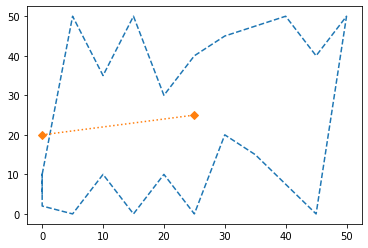

In [128]:
seg2 = Segment(Point(0,20), Point(25,25))
plt.plot(xs, ys, linestyle='dashed')
x2 = [seg2.start.x, seg2.end.x]
y2 = [seg2.start.y, seg2.end.y]
plt.plot(x2, y2, linestyle="dotted", marker="D")
inter_seg_pol(seg2, samplePolygon)


In [35]:
pol_seg.append(Segment(pol.points[2], pol.points[1]))

In [114]:
if (pol.containsPoint(seg.start) == True) and (pol.containsPoint(seg.end) == True):
    length = 0
    print('asfd')
    print(f"\nThe intersection length is: {length:.2f}")


asfd

The intersection length is: 0.00


In [143]:
data_p = [[0,5],[0,10],[0,2],[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5, 50],[5,50], [0, 10]]
samplePolygon = Polygon(data_p, xcol=0, ycol=1)
seg2 = Segment(Point(0,20), Point(25,25))
samplePolygon.containsPoint(seg2.start) == True and samplePolygon.containsPoint(seg2.end) == True

True